# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [5]:
df = pd.read_csv('data/Advertising.csv', index_col= 'Unnamed: 0')

In [6]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


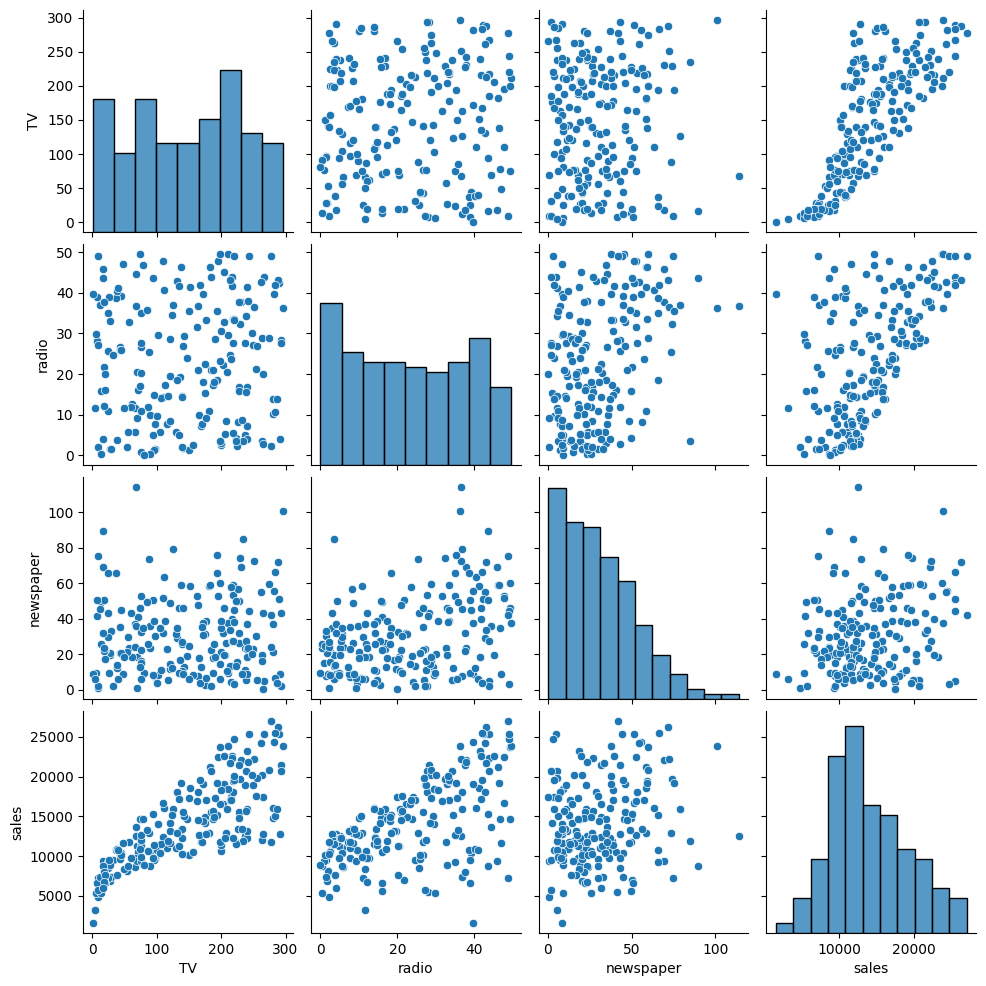

In [7]:
sns.pairplot(df)

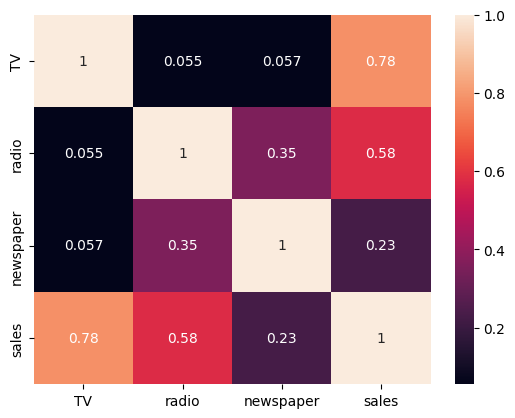

In [10]:
sns.heatmap(df.corr(), annot= True);

## Modelado

In [11]:
X = df[['TV', 'radio', 'newspaper']]
Y = df['sales']

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

In [14]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
lr_scal = LinearRegression()
lr_scal.fit(X_train_scal, Y_train)

LinearRegression()

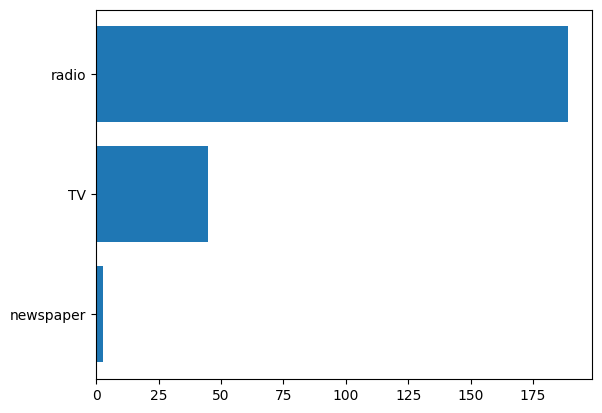

In [16]:
import matplotlib.pyplot as plt
features_std = pd.DataFrame(lr.coef_, X_train.columns, columns=['coefficient'])
features_std.sort_values('coefficient', ascending=False)
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

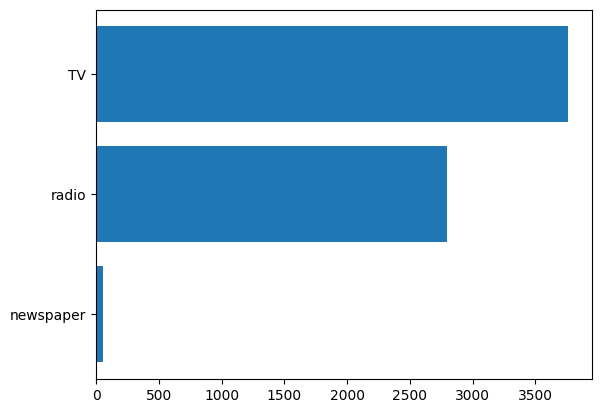

In [19]:
import matplotlib.pyplot as plt
features_std = pd.DataFrame(lr_scal.coef_, X_train.columns, columns=['coefficient'])
features_std.sort_values('coefficient', ascending=False)
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

#### Modelos entrenados:


### Modelo 1: Linear Regression

In [22]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [23]:
print('Linear Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr.predict(X_train)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr.predict(X_test)))

Linear Regression: 
------------------------------
Train: 
MAE:  1198.4678961500135
Test: 
MAE:  1460.7567168117598


### Modelo 2: Poly D2

In [24]:
poly_feats_d2 = PolynomialFeatures(degree= 2)
poly_feats_d2.fit(X_train)

X_train_poly_d2 = poly_feats_d2.transform(X_train)
X_test_poly_d2 = poly_feats_d2.transform(X_test)

In [25]:
lr_d2 = LinearRegression()
lr_d2.fit(X_train_poly_d2, Y_train)

LinearRegression()

In [27]:
print('Linear Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr.predict(X_train)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr.predict(X_test)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D2 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d2.predict(X_train_poly_d2)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d2.predict(X_test_poly_d2)))

Linear Regression: 
------------------------------
Train: 
MAE:  1198.4678961500135
Test: 
MAE:  1460.7567168117598


----------------------------------------


Poly D2 Regression: 
------------------------------
Train: 
MAE:  408.9721951355267
Test: 
MAE:  526.1794444043974


### Modelo 3: Poly D3

In [28]:
poly_feats_d3 = PolynomialFeatures(degree= 3)
poly_feats_d3.fit(X_train)

X_train_poly_d3 = poly_feats_d3.transform(X_train)
X_test_poly_d3 = poly_feats_d3.transform(X_test)

In [29]:
lr_d3 = LinearRegression()
lr_d3.fit(X_train_poly_d3, Y_train)

LinearRegression()

In [31]:
print('Linear Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr.predict(X_train)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr.predict(X_test)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D2 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d2.predict(X_train_poly_d2)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d2.predict(X_test_poly_d2)))


print('\n')
print('-' * 40)
print('\n')

print('Poly D3 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d3.predict(X_train_poly_d3)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d3.predict(X_test_poly_d3)))

Linear Regression: 
------------------------------
Train: 
MAE:  1198.4678961500135
Test: 
MAE:  1460.7567168117598


----------------------------------------


Poly D2 Regression: 
------------------------------
Train: 
MAE:  408.9721951355267
Test: 
MAE:  526.1794444043974


----------------------------------------


Poly D3 Regression: 
------------------------------
Train: 
MAE:  317.70154192142144
Test: 
MAE:  388.68170486224204


### Modelo 4: Poly D4

In [32]:
poly_feats_d4 = PolynomialFeatures(degree= 4)
poly_feats_d4.fit(X_train)

X_train_poly_d4 = poly_feats_d4.transform(X_train)
X_test_poly_d4 = poly_feats_d4.transform(X_test)

In [33]:
lr_d4 = LinearRegression()
lr_d4.fit(X_train_poly_d4, Y_train)

LinearRegression()

In [34]:
print('Linear Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr.predict(X_train)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr.predict(X_test)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D2 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d2.predict(X_train_poly_d2)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d2.predict(X_test_poly_d2)))


print('\n')
print('-' * 40)
print('\n')

print('Poly D3 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d3.predict(X_train_poly_d3)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d3.predict(X_test_poly_d3)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D4 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d4.predict(X_train_poly_d4)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d4.predict(X_test_poly_d4)))

Linear Regression: 
------------------------------
Train: 
MAE:  1198.4678961500135
Test: 
MAE:  1460.7567168117598


----------------------------------------


Poly D2 Regression: 
------------------------------
Train: 
MAE:  408.9721951355267
Test: 
MAE:  526.1794444043974


----------------------------------------


Poly D3 Regression: 
------------------------------
Train: 
MAE:  317.70154192142144
Test: 
MAE:  388.68170486224204


----------------------------------------


Poly D4 Regression: 
------------------------------
Train: 
MAE:  316.0330885361647
Test: 
MAE:  742.0708775490523


### Modelo 5: Poly D3 Ridge

In [40]:
scaler = StandardScaler()
scaler.fit(X_train_poly_d3)

X_train_poly_d3_scal = scaler.transform(X_train_poly_d3)
X_test_poly_d3_scal = scaler.transform(X_test_poly_d3)

In [36]:
baseline_error = mean_absolute_error(Y_test, lr_d3.predict(X_test_poly_d3))
baseline_error

388.68170486224204

In [41]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_poly_d3_scal, Y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_poly_d3_scal)
    ridge_error = mean_absolute_error(y_pred, Y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

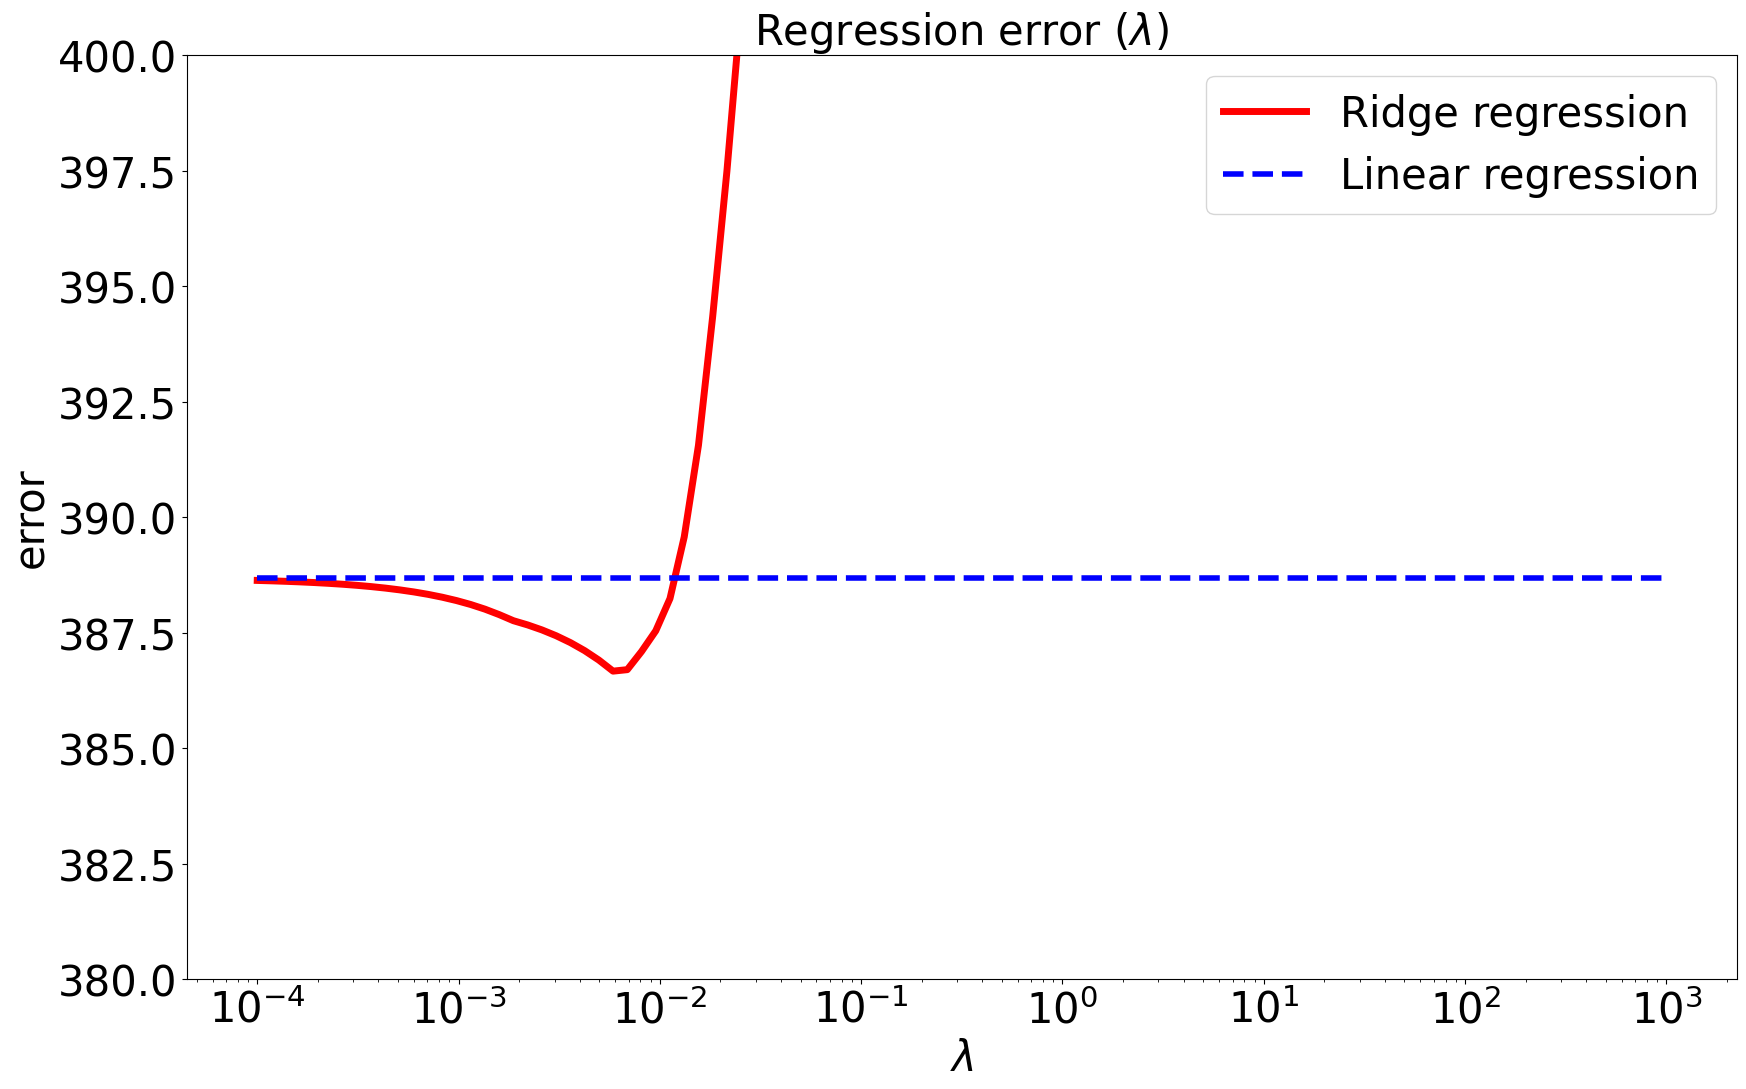

In [45]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
plt.ylim(380, 400)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [49]:
alphas[err_ridge.index(min(err_ridge))]

0.005857020818056662

In [50]:
lr_d3_scal_ridge = Ridge(alpha= 0.006)
lr_d3_scal_ridge.fit(X_train_poly_d3_scal, Y_train)

Ridge(alpha=0.006)

In [52]:
print('Linear Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr.predict(X_train)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr.predict(X_test)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D2 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d2.predict(X_train_poly_d2)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d2.predict(X_test_poly_d2)))


print('\n')
print('-' * 40)
print('\n')

print('Poly D3 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d3.predict(X_train_poly_d3)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d3.predict(X_test_poly_d3)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D4 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d4.predict(X_train_poly_d4)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d4.predict(X_test_poly_d4)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D3 Ridge: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d3_scal_ridge.predict(X_train_poly_d3_scal)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d3_scal_ridge.predict(X_test_poly_d3_scal)))

Linear Regression: 
------------------------------
Train: 
MAE:  1198.4678961500135
Test: 
MAE:  1460.7567168117598


----------------------------------------


Poly D2 Regression: 
------------------------------
Train: 
MAE:  408.9721951355267
Test: 
MAE:  526.1794444043974


----------------------------------------


Poly D3 Regression: 
------------------------------
Train: 
MAE:  317.70154192142144
Test: 
MAE:  388.68170486224204


----------------------------------------


Poly D4 Regression: 
------------------------------
Train: 
MAE:  316.0330885361647
Test: 
MAE:  742.0708775490523


----------------------------------------


Poly D3 Ridge: 
------------------------------
Train: 
MAE:  315.7089041464107
Test: 
MAE:  386.62954055089665


### Modelo 5: Poly D3 Lasso

In [55]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter= 100000)
    lasso.fit(X_train_poly_d3_scal, Y_train)
    
    coef_lasso.append(lasso.coef_)
    
    y_pred = lasso.predict(X_test_poly_d3_scal)
    lasso_error = mean_absolute_error(y_pred, Y_test)
    
    err_lasso.append(lasso_error)
    baseline.append(baseline_error)

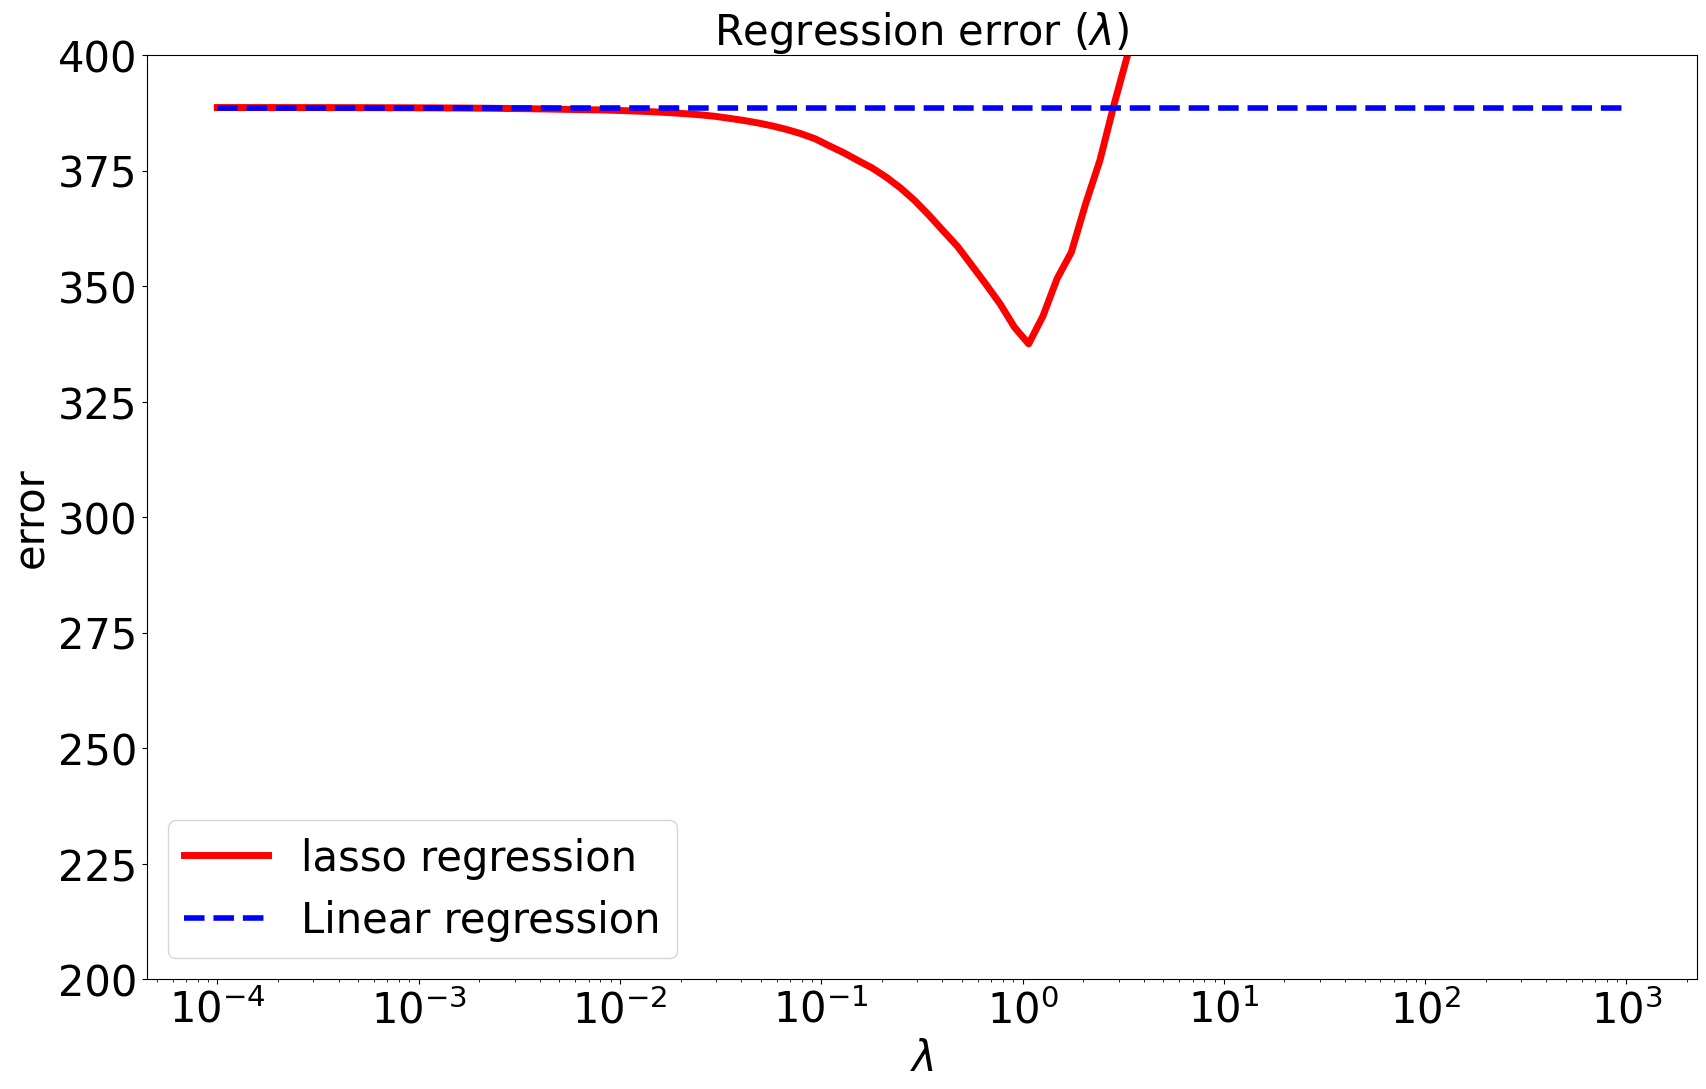

In [57]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
plt.ylim(200, 400)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [58]:
min(err_lasso)

337.51943014614596

In [60]:
alphas[err_lasso.index(min(err_lasso))]

1.072267222010323

In [61]:
lr_d3_scal_lasso = Lasso(alpha= 1.07)
lr_d3_scal_lasso.fit(X_train_poly_d3_scal, Y_train)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+07, tolerance: 4.150e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1.07)

In [62]:
print('Linear Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr.predict(X_train)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr.predict(X_test)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D2 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d2.predict(X_train_poly_d2)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d2.predict(X_test_poly_d2)))


print('\n')
print('-' * 40)
print('\n')

print('Poly D3 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d3.predict(X_train_poly_d3)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d3.predict(X_test_poly_d3)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D4 Regression: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d4.predict(X_train_poly_d4)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d4.predict(X_test_poly_d4)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D3 Ridge: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d3_scal_ridge.predict(X_train_poly_d3_scal)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d3_scal_ridge.predict(X_test_poly_d3_scal)))

print('\n')
print('-' * 40)
print('\n')

print('Poly D3 Lasso: ')
print('-' * 30)
print('Train: ')
print('MAE: ', mean_absolute_error(Y_train, lr_d3_scal_lasso.predict(X_train_poly_d3_scal)))
print('Test: ')
print('MAE: ', mean_absolute_error(Y_test, lr_d3_scal_lasso.predict(X_test_poly_d3_scal)))

Linear Regression: 
------------------------------
Train: 
MAE:  1198.4678961500135
Test: 
MAE:  1460.7567168117598


----------------------------------------


Poly D2 Regression: 
------------------------------
Train: 
MAE:  408.9721951355267
Test: 
MAE:  526.1794444043974


----------------------------------------


Poly D3 Regression: 
------------------------------
Train: 
MAE:  317.70154192142144
Test: 
MAE:  388.68170486224204


----------------------------------------


Poly D4 Regression: 
------------------------------
Train: 
MAE:  316.0330885361647
Test: 
MAE:  742.0708775490523


----------------------------------------


Poly D3 Ridge: 
------------------------------
Train: 
MAE:  315.7089041464107
Test: 
MAE:  386.62954055089665


----------------------------------------


Poly D3 Lasso: 
------------------------------
Train: 
MAE:  320.9581756800159
Test: 
MAE:  350.8244779795324


In [ ]:
# import matplotlib.pyplot as plt
# features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['coefficient'])
# features_std.sort_values('coefficient', ascending=False)
# features_std = features_std.sort_values('coefficient', ascending=True)
# plt.barh(features_std.index, features_std.coefficient);